# Análisis y visualización de datos abiertos con python
# Graficación y visualización de datos

Para la parte teórica de este tutorial vean la presentación de [Teoría de la
Visualización de datos](https://docs.google.com/presentation/d/18irBZ2lz2gkI-0qw_rukGj0sLBvFVj9P7z9Cq5PjAKI/edit?usp=sharing)


Cargar los datos, usaremos el pickle que ya incluye las configuraciones de tipos de datos y categorías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

in_file = "data_clean/MFC_ActualizacionNov2022_clean.pkl"
with open(in_file, 'rb') as f:
     df = load(f)
df.tail()


,Panteón_origen,Estatus_FC,Fecha_inhumación,Fecha_inhumación_diasemana,Fecha_inhumación_semanaaño,Fecha_defunción,Fecha_defunción_diasemana,Fecha_defunción_semanaaño,Restos_tipo,Sexo,...,Primer_apellido,Segundo_Apellido,Nombres,Nombre_completo,Institución_origen,Tipo_institución_origen,Rdoc,Marca_temporal,Marca_temporal_diasemana,Marca_temporal_semanaaño
ID,,,,,,,,,,,,,,,,,,,,,
XX-P996,Panteón Civil de Dolores,Inhumación,2018-09-01,5,35,NaT,NaN,NaN,Cadáver,Masculino,...,Flores,Rosette,Sergio,Sergio Flores Rosette,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública,Sí,2020-04-06 21:19:52.451,0,15
XX-P997,Panteón Civil de Dolores,Inhumación,2018-09-01,5,35,2017-10-27,4.0,43.0,Cadáver,Masculino,...,Juarez,Chavez,Juan Carlos,Juan Carlos Juarez Chavez,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública,Sí,2020-04-06 21:22:53.304,0,15
XX-P998,Panteón Civil de Dolores,Inhumación,2018-09-01,5,35,2018-08-18,5.0,33.0,Cadáver,Masculino,...,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial,Sí,2020-04-06 21:30:12.169,0,15
XX-P999,Panteón Civil de Dolores,Inhumación,2018-09-01,5,35,2018-05-22,1.0,21.0,Cadáver,Femenino,...,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial,Sí,2020-04-06 21:32:30.839,0,15
XX-P1000,Panteón Civil de Dolores,Inhumación,2018-09-01,5,35,2018-05-29,1.0,22.0,Cadáver,Masculino,...,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial,Sí,2020-04-06 21:35:23.157,0,15


Revisemos los tipos de datos

In [2]:
df.dtypes

Panteón_origen                      category
Estatus_FC                          category
Fecha_inhumación              datetime64[ns]
Fecha_inhumación_diasemana             int64
Fecha_inhumación_semanaaño             int64
Fecha_defunción               datetime64[ns]
Fecha_defunción_diasemana            float64
Fecha_defunción_semanaaño            float64
Restos_tipo                         category
Sexo                                category
Edad                                  object
Edad_años                            float64
Conocido_Desconocido                category
Primer_apellido                       object
Segundo_Apellido                      object
Nombres                               object
Nombre_completo                       object
Institución_origen                    object
Tipo_institución_origen               object
Rdoc                                  object
Marca_temporal                datetime64[ns]
Marca_temporal_diasemana               int64
Marca_temp

In [3]:
df['Restos_tipo']

ID
XX-P001     Restos cremados
XX-P002             Cadáver
XX-P003             Cadáver
XX-P004             Cadáver
XX-P005             Cadáver
                 ...       
XX-P996             Cadáver
XX-P997             Cadáver
XX-P998             Cadáver
XX-P999             Cadáver
XX-P1000            Cadáver
Name: Restos_tipo, Length: 1000, dtype: category
Categories (6, object): ['Cadáver' < 'Restos humanos' < 'Restos cremados' < 'Restos óseos' < 'Feto' < 'Miembros']

## Pandas plot

"""Explica que es matplotlib"""

La forma más facíl de gráficar un dataframe es con el comando `.plot()` de pandas.

En general el comando plot toma una serie o dataframe, un tipo de gráfico, una serie de intruccionessobre ejes, etiquetas etc y regresa un objeto `matplotlib.axes.Axes`. Además, es posible pasarle argumentos específicos de matplotlib para mejorar la gráfica. Les recomiendo ver la [documentación de la función](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Loas tipos de gráficas que se pueden hacer con este comando son:
* `line` : line plot (default)
* `bar` : vertical bar plot
* `barh` : horizontal bar plot
* `hist` : histogram
* `box` : boxplot
* `kde` : Kernel Density Estimation plot
* `density` : same as `kde`
* `area` : area plot
* `pie` : pie plot
* `scatter` : scatter plot (DataFrame only)
* `hexbin` : hexbin plot (DataFrame only)

## Lineas

La opción por default de graficación de pandas es lineas

Por default, esta función coloca el indice en el eje x y los valores númericos de la función en el eje y

<AxesSubplot: xlabel='ID'>

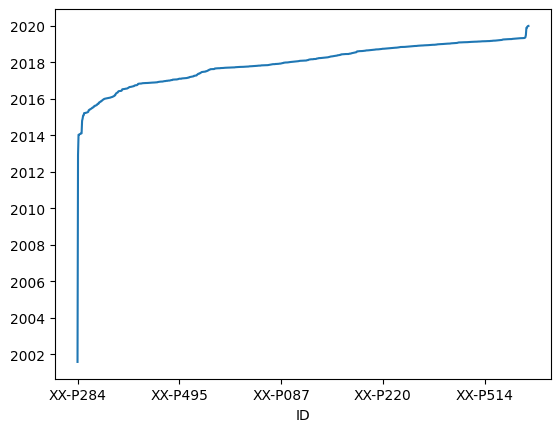

In [4]:
df['Fecha_defunción'].sort_values()  .plot()

Si le damos dos columnas graficará cada una en una serie, las columnas debén de ser comparables

<AxesSubplot: xlabel='ID'>

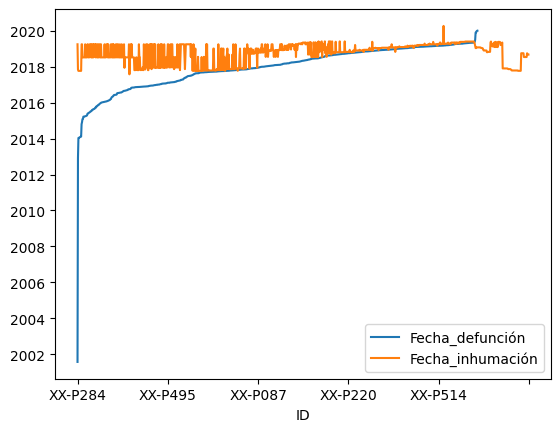

In [5]:
df[['Fecha_defunción','Fecha_inhumación']].sort_values(by='Fecha_defunción') .plot()

## Scatterplot

Podemos cambiar el tipo de gráfica con la opción `kind`o especificandola como función.

Por ejemplo, para una gráfica de puntos scatter las opciones son:
* `DataFrame.plot(kind='scatter')`
* `DataFrame.plot.scatter()`

Para este gráfico es necesario marcar las columnas que se usarán como `x` y `y`

<AxesSubplot: xlabel='Fecha_defunción', ylabel='Fecha_inhumación'>

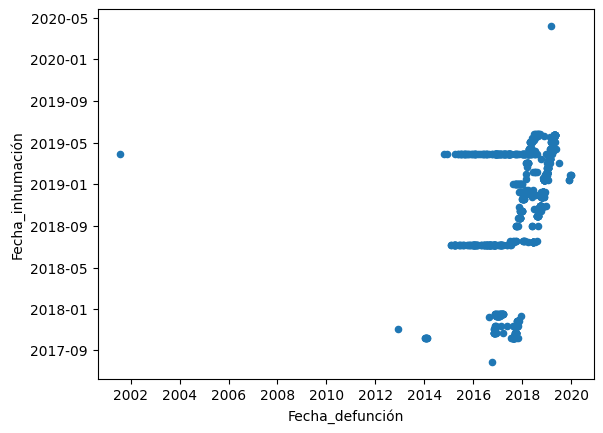

In [6]:
df.plot.scatter(x='Fecha_defunción', y='Fecha_inhumación')

## Barras

Pandas puede realizar gráficas de barras, en este caso primero calcularemos el número de tipo de restos.



<AxesSubplot: >

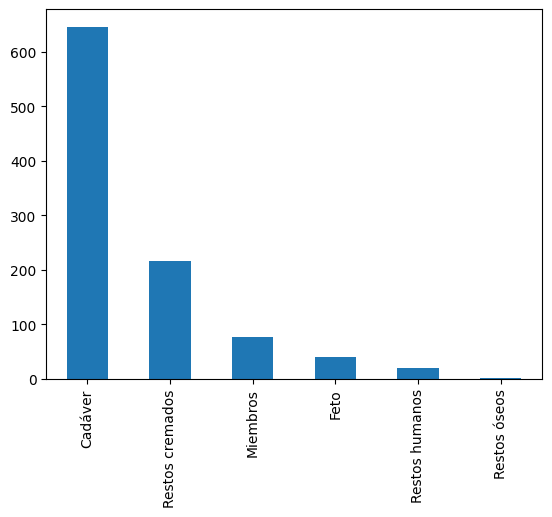

In [7]:
df['Restos_tipo'].value_counts().plot(kind='bar')

<AxesSubplot: >

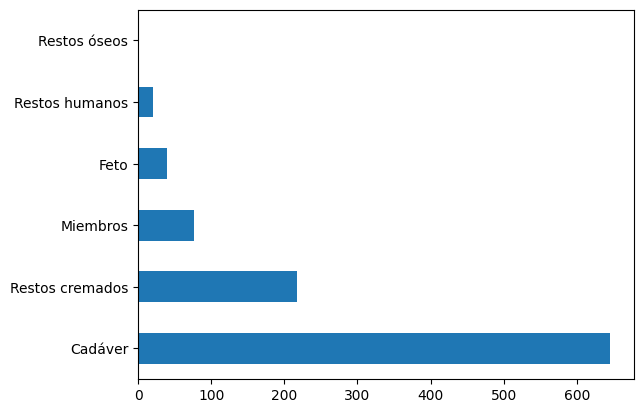

In [8]:
df['Restos_tipo'].value_counts().plot(kind='barh')

In [9]:
df_tipo_sexo = pd.pivot_table(df, values='Conocido_Desconocido', index='Restos_tipo', columns='Sexo', aggfunc='count')
df_tipo_sexo = df_tipo_sexo[['Masculino','Femenino','Indeterminado']]
df_tipo_sexo

Sexo,Masculino,Femenino,Indeterminado
Restos_tipo,,,
Cadáver,565,80,1
Restos humanos,12,6,2
Restos cremados,157,60,0
Restos óseos,0,0,1
Feto,26,8,6
Miembros,58,15,3


<AxesSubplot: xlabel='Restos_tipo'>

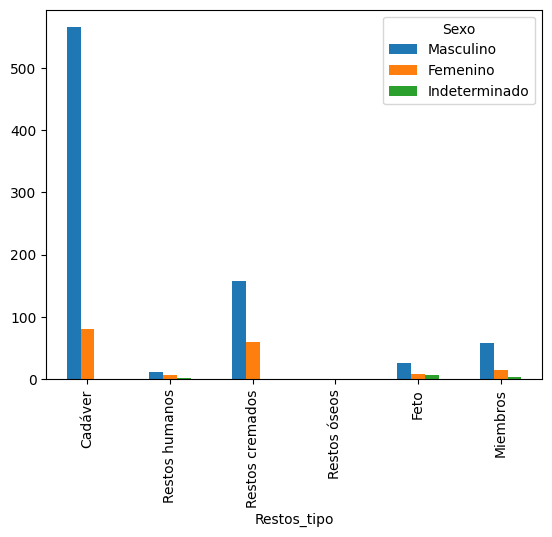

In [10]:
df_tipo_sexo.plot(kind='bar')

<AxesSubplot: xlabel='Restos_tipo'>

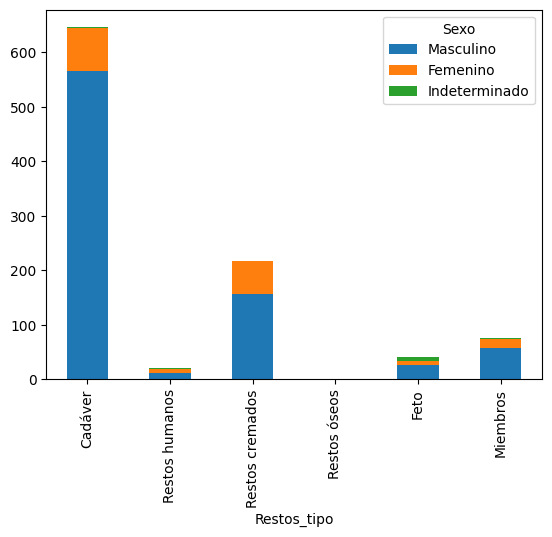

In [11]:
df_tipo_sexo.plot(kind='bar', stacked=True)

## Histogramas

<AxesSubplot: ylabel='Frequency'>

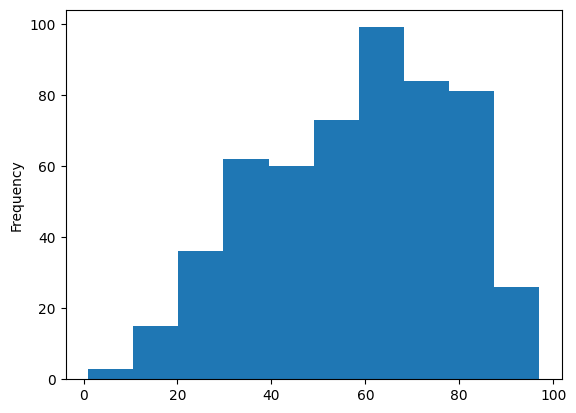

In [12]:
df['Edad_años'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

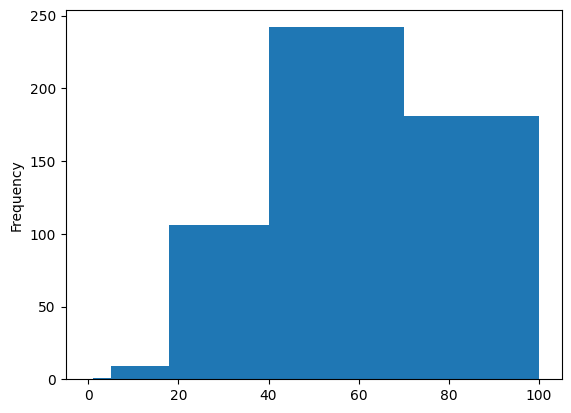

In [13]:
df['Edad_años'].plot.hist(bins=[0,1,5,18,40,70,100])

## KDE

<AxesSubplot: ylabel='Density'>

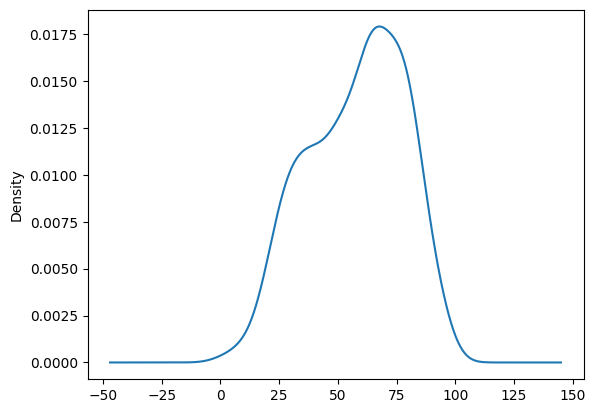

In [14]:
df['Edad_años'].plot(kind='kde')

## Ejemplo

Seleccionar variables

* Conocidos y desconocidos: eje x
* Incidencias (numericas): eje y
* Por sexo: color y multiple
* Por tipo de restos: color y multiple 

In [15]:
dic_col ={'Femenino':'#bebada', 'Indeterminado':'#d9d9d9', 'Masculino':'#80b1d3', 
          'Restos cremados':'#b3de69','Cadáver':'#fb8072','Feto':'#fdb462',
          'Miembros':'#fccde5','Restos humanos':'#8dd3c7','Restos óseos':'#ffffb3',}
dic_col


{'Femenino': '#bebada',
 'Indeterminado': '#d9d9d9',
 'Masculino': '#80b1d3',
 'Restos cremados': '#b3de69',
 'Cadáver': '#fb8072',
 'Feto': '#fdb462',
 'Miembros': '#fccde5',
 'Restos humanos': '#8dd3c7',
 'Restos óseos': '#ffffb3'}

In [16]:
data_sexo = pd.pivot_table(df, values='Estatus_FC', index='Conocido_Desconocido', columns='Sexo', aggfunc='count')
data_sexo

Sexo,Femenino,Indeterminado,Masculino
Conocido_Desconocido,,,
Conocido,136,3,440
Desconocido,33,10,378


Colores

In [17]:
data_restos = pd.pivot_table(df, values='Estatus_FC', index='Conocido_Desconocido', columns='Restos_tipo', aggfunc='count')
data_restos

Restos_tipo,Cadáver,Restos humanos,Restos cremados,Restos óseos,Feto,Miembros
Conocido_Desconocido,,,,,,
Conocido,257,18,216,0,16,72
Desconocido,389,2,1,1,24,4


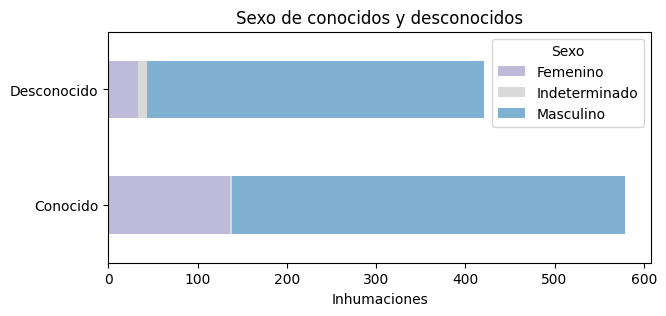

In [43]:
fig = data_sexo.plot.barh(stacked=True, 
                    color=dic_col, figsize=[7,3],
                    xlabel="Inhumaciones", ylabel="", 
                    title="Sexo de conocidos y desconocidos",
                    )
plt.show()

In [42]:
f_plt_sexo = "images/conocido_desconocido_vs_sexo.svg"
fig.savefig(f_plt_sexo)

<AxesSubplot: title={'center': 'Tipo de restos de conocidos y desconocidos'}, xlabel='Inhumaciones'>

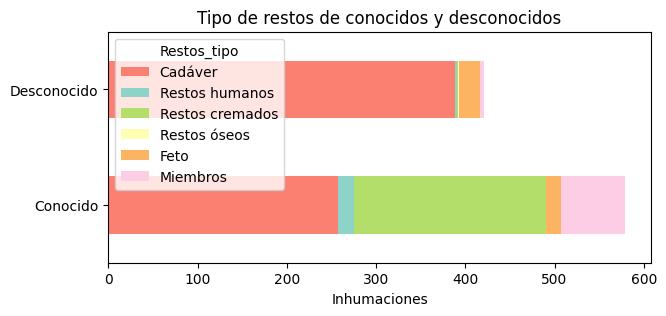

In [44]:
data_restos.plot.barh(stacked=True, 
                      color=dic_col, figsize=[7,3],
                      xlabel="Inhumaciones", ylabel="", 
                      title="Tipo de restos de conocidos y desconocidos",
                      )

In [ ]:
f_plt_sexo = "images/conocido_desconocido_vs_sexo.svg"
fig.savefig(f_plt_sexo)